In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, LogFormatterSciNotation
from matplotlib.lines import Line2D

In [10]:
def read_and_filter_cross_section_data(directory):
    data = {'elab': [], 'total': [], 'err_total': [], 'elastic': [], 'err_elastic': [], 'inelastic': [], 'err_inelastic': []}

    for filename in os.listdir(directory):
        if filename.endswith(".dat"):  # Assuming the files are .dat files
            file_path = os.path.join(directory, filename)
            df = pd.read_csv(file_path, delimiter='\t', header=None, dtype=str)  # Read as string to handle non-numeric data
            df.columns = ['Type', 'Value']  # Assign column names
            df['Value'] = pd.to_numeric(df['Value'], errors='coerce')  # Convert to numeric, setting non-numeric values to NaN
            df = df.dropna()  # Remove NaN values

            # Extract elab value
            elab_value = df.loc[df['Type'] == 'elab', 'Value'].values[0]
            
            # Extract relevant cross-section values
            total_value = df.loc[df['Type'] == 'sig_tot', 'Value'].values[0]
            err_total_value = df.loc[df['Type'] == 'err_tot', 'Value'].values[0]
            elastic_value = df.loc[df['Type'] == 'sig_el', 'Value'].values[0]
            err_elastic_value = df.loc[df['Type'] == 'err_el', 'Value'].values[0]
            inelastic_value = df.loc[df['Type'] == 'sig_inel', 'Value'].values[0]
            err_inelastic_value = df.loc[df['Type'] == 'err_inel', 'Value'].values[0]

            data['elab'].append(elab_value)
            data['total'].append(total_value)
            data['err_total'].append(err_total_value)
            data['elastic'].append(elastic_value)
            data['err_elastic'].append(err_elastic_value)
            data['inelastic'].append(inelastic_value)
            data['err_inelastic'].append(err_inelastic_value)

    # Convert the data dictionary to a DataFrame
    df_data = pd.DataFrame(data)
    # Sort the DataFrame by 'elab'
    df_data = df_data.sort_values(by='elab').reset_index(drop=True)

    return df_data

In [11]:
data_8311 = read_and_filter_cross_section_data('./8311')
data_8312 = read_and_filter_cross_section_data('./8312')

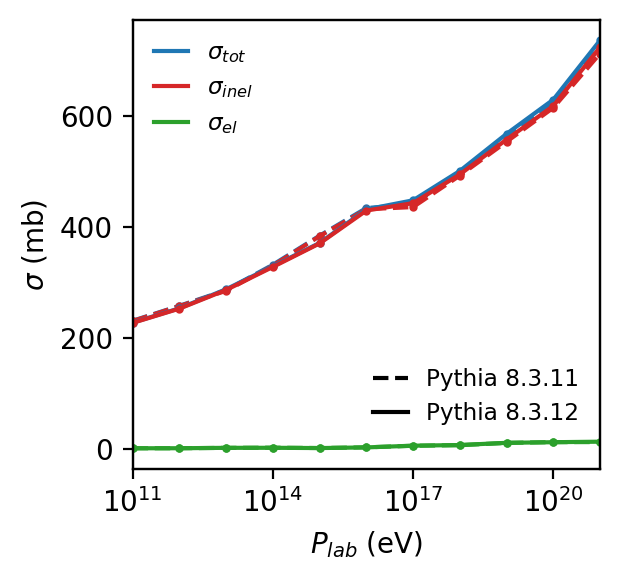

In [12]:
def plot_cross_sections(data_8311, data_8312):
    fig, ax = plt.subplots(figsize=(3.2, 3), dpi=200)

    colors = {'total': 'tab:blue', 'elastic': 'tab:green', 'inelastic': 'tab:red'}

    # version 8311 (dashed lines)
    ax.errorbar(data_8311['elab']*1e9, data_8311['total'], yerr=data_8311['err_total'], 
                fmt='o', ms=2, ecolor='lightgrey', elinewidth=3, linestyle='--', color='tab:blue')
    ax.errorbar(data_8311['elab']*1e9, data_8311['inelastic'], yerr=data_8311['err_inelastic'], 
                fmt='o', ms=2, ecolor='lightgrey', elinewidth=3, linestyle='--', color='tab:red')
    ax.errorbar(data_8311['elab']*1e9, data_8311['elastic'], yerr=data_8311['err_elastic'], 
                fmt='o', ms=2, ecolor='lightgrey', elinewidth=3, linestyle='--', color='tab:green')

    # version 8312 (solid lines)
    ax.errorbar(data_8312['elab']*1e9, data_8312['total'], yerr=data_8312['err_total'], 
                fmt='o', ms=2, ecolor='lightgrey', elinewidth=3, linestyle='-', color='tab:blue')
    ax.errorbar(data_8312['elab']*1e9, data_8312['inelastic'], yerr=data_8312['err_inelastic'], 
                fmt='o', ms=2, ecolor='lightgrey', elinewidth=3, linestyle='-', color='tab:red')
    ax.errorbar(data_8312['elab']*1e9, data_8312['elastic'], yerr=data_8312['err_elastic'], 
                fmt='o', ms=2, ecolor='lightgrey', elinewidth=3, linestyle='-', color='tab:green')

    ax.set_xlabel(r"$P_{lab}$ (eV)")
    ax.set_ylabel(r"$\sigma$ (mb)")
    ax.set_xscale('log')
    ax.set_xlim(1e11, 1e21)

    ax.plot([None], [None], ls='-', color="tab:blue", label=r"$\sigma_{tot}$")
    ax.plot([None], [None], ls='-', color="tab:red", label=r"$\sigma_{inel}$")
    ax.plot([None], [None], ls='-', color="tab:green", label=r"$\sigma_{el}$")
    ax.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize="small", frameon=False, handlelength=1.5)
    
    ax2 = ax.twinx()
    ax2.get_yaxis().set_visible(False)
    ax2.plot([None], [None], "--", color="black", label="Pythia 8.3.11")
    ax2.plot([None], [None], "-", color="black", label="Pythia 8.3.12")
    ax2.legend(loc='lower right', bbox_to_anchor=(1, 0.05), fontsize="small", frameon=False, handlelength=1.5)

    fig.tight_layout()
    fig.savefig("xs_pipN.png", dpi=400)

    plt.show()

plot_cross_sections(data_8311, data_8312)


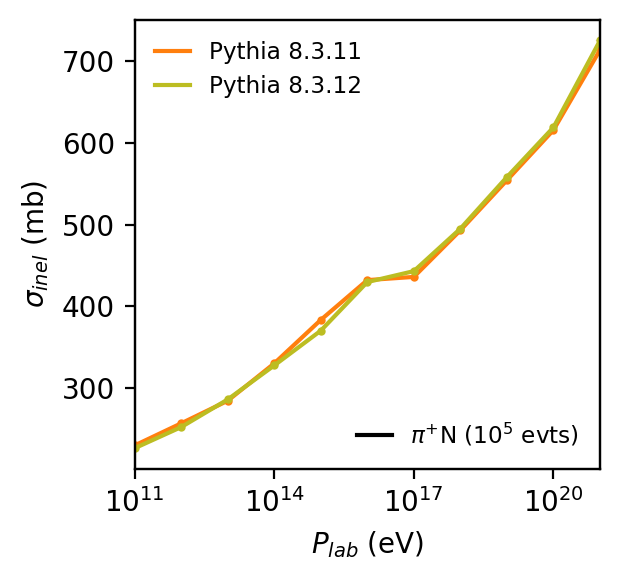

In [13]:
def plot_inel_cross_sections(data_8311, data_8312):
    fig, ax = plt.subplots(figsize=(3.2, 3), dpi=200)

    # version 8311 (dashed lines)
    ax.errorbar(data_8311['elab']*1e9, data_8311['inelastic'], yerr=data_8311['err_inelastic'], 
                fmt='o', ms=2, ecolor='lightgrey', elinewidth=3, linestyle='-', color='tab:orange')

    # version 8312 (solid lines)
    ax.errorbar(data_8312['elab']*1e9, data_8312['inelastic'], yerr=data_8312['err_inelastic'], 
                fmt='o', ms=2, ecolor='lightgrey', elinewidth=3, linestyle='-', color='tab:olive')


    ax.set_xlabel(r"$P_{lab}$ (eV)")
    ax.set_ylabel(r"$\sigma_{inel}$ (mb)")
    ax.set_xscale('log')
    ax.set_xlim(1e11, 1e21)

    ax.plot([None], [None], ls='-', color="tab:orange", label="Pythia 8.3.11")
    ax.plot([None], [None], ls='-', color="tab:olive", label="Pythia 8.3.12")
    ax.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize="small", frameon=False, handlelength=1.5)
    
    ax2 = ax.twinx()
    ax2.get_yaxis().set_visible(False)
    ax2.plot([None], [None], "-", color="black", label=r"$\pi^{+}$N (10$^5$ evts)")
    ax2.legend(loc='lower right', bbox_to_anchor=(1, 0), fontsize="small", frameon=False, handlelength=1.5)

    fig.tight_layout()
    fig.savefig("xs_pipN.png", dpi=400)

    plt.show()

plot_inel_cross_sections(data_8311, data_8312)

In [14]:
ratios_total = data_8311['total'] / data_8312['total']
ratios_inelastic = data_8311['inelastic'] / data_8312['inelastic']
ratios_elastic = data_8311['elastic'] / data_8312['elastic']
    
err_ratios_total = ratios_total * ((data_8311['total'] * (1 + data_8311['err_total']/data_8311['total'])) / (data_8312['total'] * (1 + data_8312['err_total']/data_8312['total'])))
err_ratios_inelastic = ratios_inelastic * ((data_8311['inelastic'] * (1 + data_8311['err_inelastic']/data_8311['inelastic'])) / (data_8312['inelastic'] * (1 + data_8312['err_inelastic']/data_8312['inelastic'])))
err_ratios_elastic = ratios_elastic * ((data_8311['elastic'] * (1 + data_8311['err_elastic']/data_8311['elastic'])) / (data_8312['elastic'] * (1 + data_8312['err_elastic']/data_8312['elastic'])))

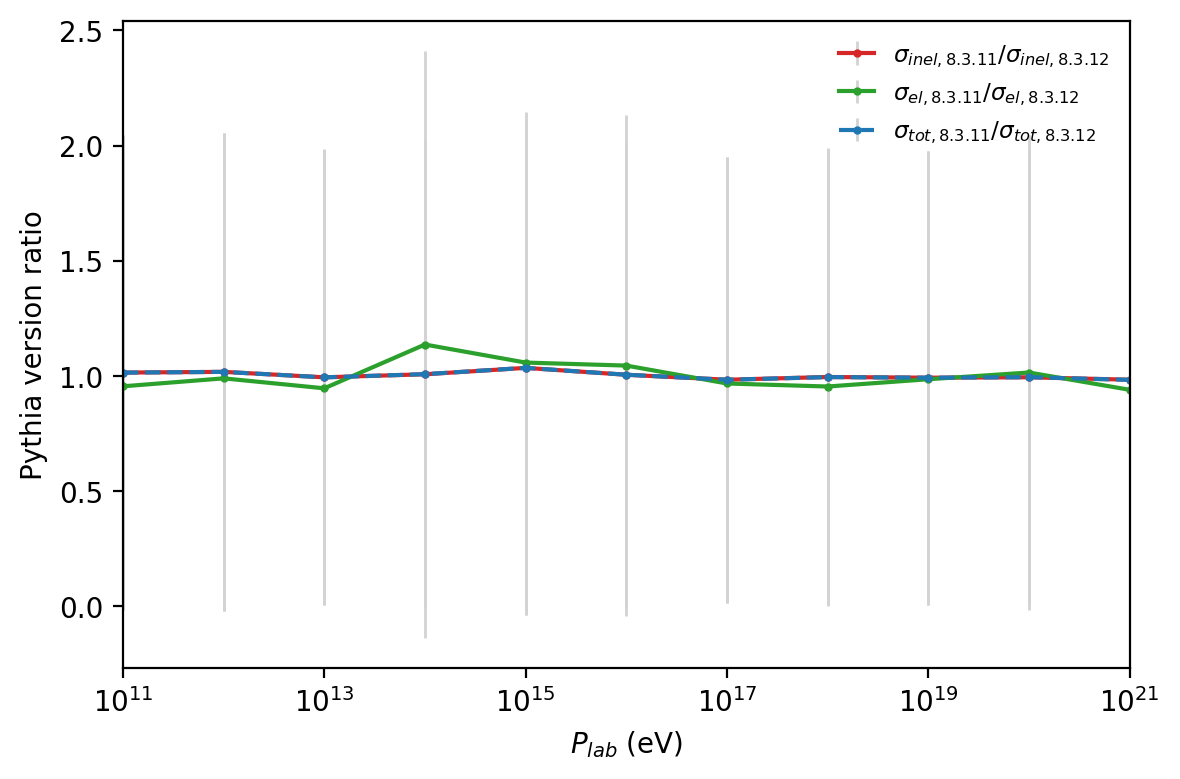

In [17]:
def plot_ratio_merged(data_8311, data_8312):
    fig, ax = plt.subplots(figsize=(6, 4), dpi=200)

    ax.errorbar(data_8311['elab']*1e9, ratios_inelastic, yerr=err_ratios_inelastic, 
                fmt='o', ms=2, ecolor='lightgrey', elinewidth=1, linestyle='-', color='tab:red', label=r"$\sigma_{inel, 8.3.11} / \sigma_{inel, 8.3.12}$")
    ax.errorbar(data_8311['elab']*1e9, ratios_elastic, yerr=err_ratios_elastic, 
                fmt='o', ms=2, ecolor='lightgrey', elinewidth=1, linestyle='-', color='tab:green', label=r"$\sigma_{el, 8.3.11} / \sigma_{el, 8.3.12}$")
    ax.errorbar(data_8311['elab']*1e9, ratios_total, yerr=err_ratios_total, 
                fmt='o', ms=2, ecolor='lightgrey', elinewidth=1, linestyle='--', color='tab:blue', label=r"$\sigma_{tot, 8.3.11} / \sigma_{tot, 8.3.12}$")
    
    ax.set_xlabel(r"$P_{lab}$ (eV)")
    ax.set_ylabel("Pythia version ratio")
    ax.set_xscale('log')
    ax.set_xlim(1e11, 1e21)

    ax.legend(loc='upper right', fontsize="small", frameon=False, handlelength=1.5)

    fig.tight_layout()
    fig.savefig("ratios_merged_pipN.png", dpi=400)
    plt.show()
   
plot_ratio_merged(data_8311, data_8312)


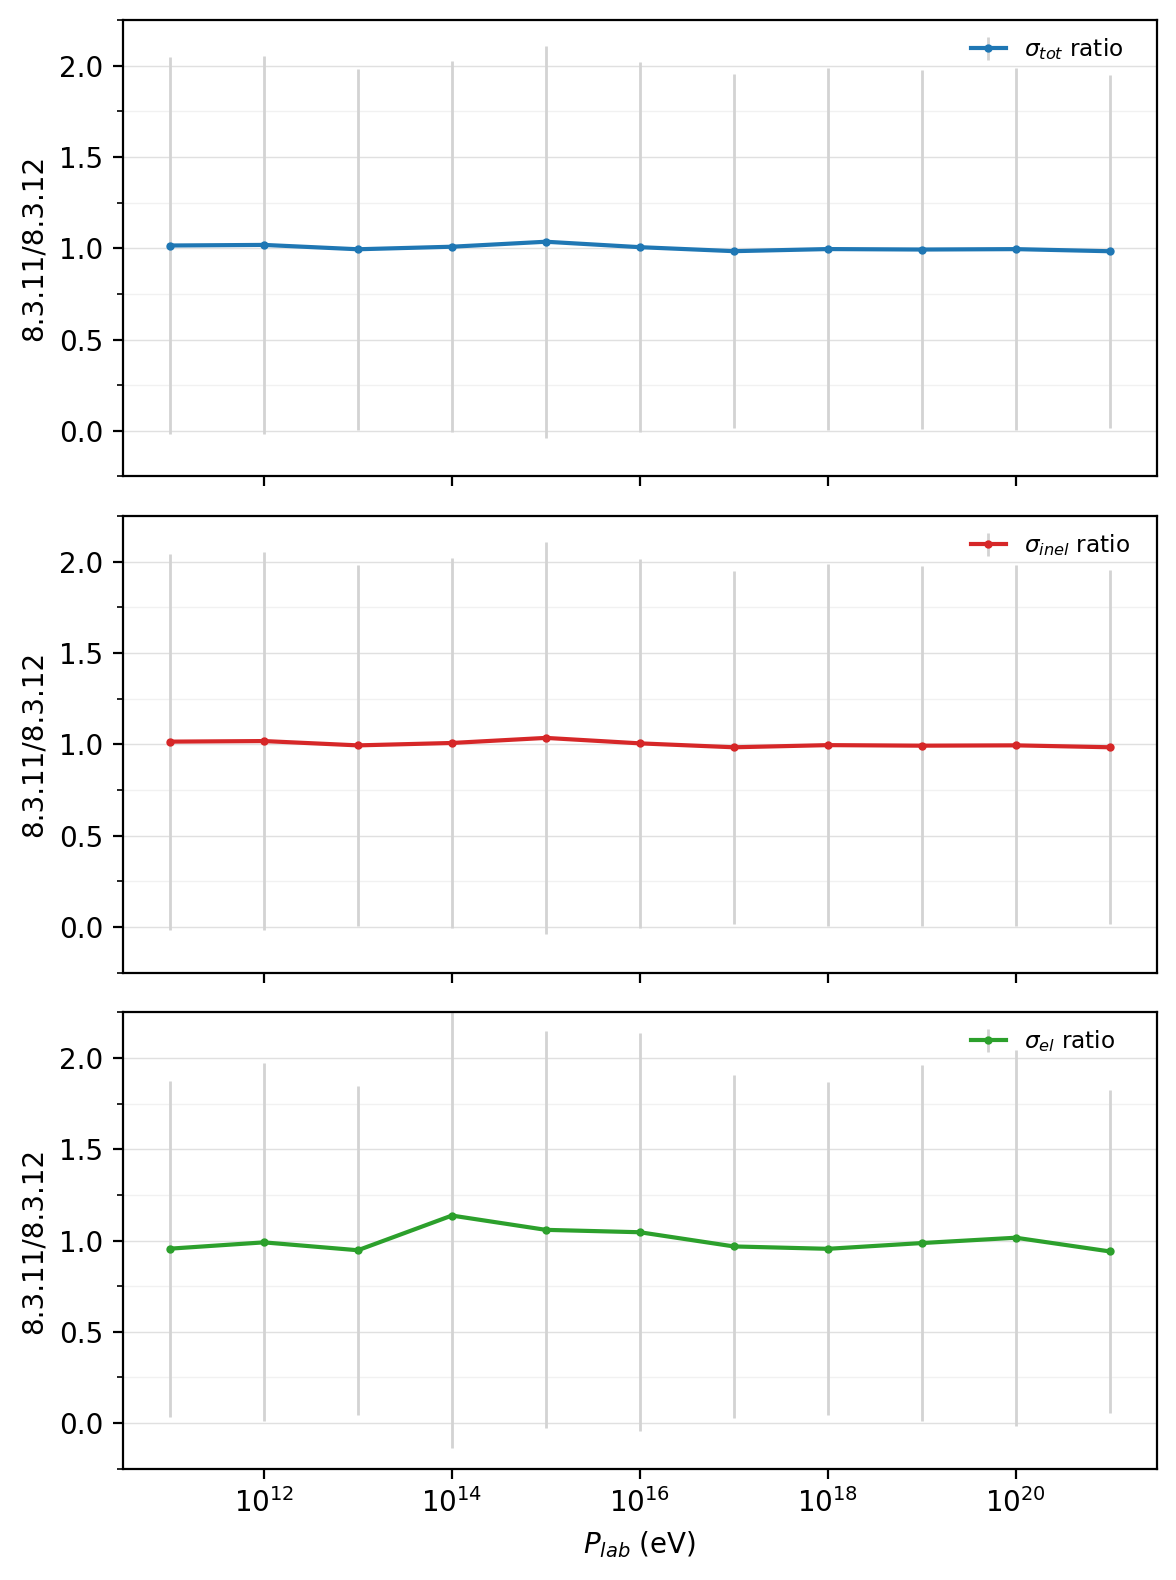

In [24]:
def plot_ratio_individual(data_8311, data_8312):
    fig, axs = plt.subplots(3, 1, figsize=(6, 8), dpi=200, sharex=True)
    
    colors = {'total': 'tab:blue', 'elastic': 'tab:green', 'inelastic': 'tab:red'}

    ratios = {
        'total': ratios_total,
        'inelastic': ratios_inelastic,
        'elastic': ratios_elastic
    }
    
    err_ratios = {
        'total': err_ratios_total,
        'inelastic': err_ratios_inelastic,
        'elastic': err_ratios_elastic
    }
    
    label_ratios = {
        'total': '$\sigma_{tot}$ ratio',
        'inelastic': '$\sigma_{inel}$ ratio',
        'elastic': '$\sigma_{el}$ ratio'
    }
    
    minor_ticks = np.arange(-1, 3, 0.25)

    for i, (key, ratio) in enumerate(ratios.items()):
        ax = axs[i]
        ax.errorbar(data_8311['elab']*1e9, ratio, 
                    yerr=err_ratios[key], 
                    fmt='o', ms=2, ecolor='lightgrey', elinewidth=1, linestyle='-', color=colors[key], label=label_ratios[key])
        ax.set_yticks(minor_ticks, minor=True)
        ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', linewidth=0.5, alpha=0.7)
        ax.yaxis.grid(True, linestyle='-', which='minor', color='lightgrey', linewidth=0.5, alpha=0.3)
        ax.set_ylabel("8.3.11/8.3.12")
        ax.set_xscale('log')
        ax.set_ylim(-0.25, 2.25)
        ax.legend(loc='upper left', bbox_to_anchor=(0.8, 1.01), fontsize="small", frameon=False, handlelength=1.5)

    axs[-1].set_xlabel(r"$P_{lab}$ (eV)")
    plt.setp(axs[-1].get_xticklabels(), visible=True)

    fig.tight_layout()
    fig.savefig("ratios_individual_pipN.png", dpi=400)
    plt.show()
    
plot_ratio_individual(data_8311, data_8312)